In [65]:
# !jupyter nbconvert --to html /content/E_commerce_Python_EDA_Campaign.ipynb

# E-Commerce Capstone - Price Optimization

**Objective:** Optimizing retail prices involves finding the ideal balance between pricing and customer demand to maximize revenue and profitability. By leveraging data and strategic insights, this process aims to set prices that drive sales, boost profits, and ensure customer satisfaction.

## Importing Python Libraries

In [66]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset


In [67]:
#Load the dataset
df=pd.read_csv('/content/price_optimsation_dataset.csv')
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [68]:
df.shape

(676, 30)

In [69]:
#basic exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [71]:
# Checking for duplicates
df.duplicated().sum()

0

In [72]:
# Checking for missing values
df.isnull().sum()/df.shape[0]*100

,0
product_id,0.0
product_category_name,0.0
month_year,0.0
qty,0.0
total_price,0.0
freight_price,0.0
unit_price,0.0
product_name_lenght,0.0
product_description_lenght,0.0
product_photos_qty,0.0


## Non-Graphical Analysis

In [73]:
# Function to print basic useful details for a given column
def get_column_details(df,column):
  print("Details of",column,"column")

  #DataType of column
  print("\nDataType: ",df[column].dtype)

  #Check if null values are present
  count_null = df[column].isnull().sum()
  if count_null==0:
      print("\nThere are no null values")
  elif count_null>0:
      print("\nThere are ",count_null," null values")

  #Get Number of Unique Values
  print("\nNumber of Unique Values: ",df[column].nunique())

  #Get Distribution of Column
  print("\nDistribution of column:\n")
  print(df[column].value_counts())

In [74]:
for i in df.columns:
 get_column_details(df,i)

Details of product_id column

DataType:  object

There are no null values

Number of Unique Values:  52

Distribution of column:

product_id
health5       20
health7       20
bed2          19
garden1       18
health9       18
garden3       18
computers4    18
health8       17
watches1      17
garden9       17
garden2       17
garden7       16
garden10      16
garden6       16
bed1          16
computers1    15
cool1         15
watches3      15
watches2      15
garden5       14
garden4       14
garden8       14
watches6      14
perfumery2    13
cool2         13
furniture2    13
health2       13
furniture1    13
perfumery1    13
cool5         13
watches7      12
furniture3    12
consoles1     12
health4       11
bed3          11
computers3    10
computers2    10
bed4          10
consoles2     10
watches4      10
watches5      10
furniture4    10
watches8      10
health1        9
cool4          9
computers6     8
computers5     8
health3        8
cool3          7
health10       7
health6  

## Outlier Detection and Handling

In [75]:
# Function to calculate outlier percentage for each numerical column
def calculate_outlier_percentage(df):
  outlier_percentage = {}
  for col in df.select_dtypes(include=['float64', 'int64']).columns:
      # Calculate Q1 (25th percentile) and Q3 (75th percentile)
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)

      # Calculate IQR
      IQR = Q3 - Q1

      # Determine outlier boundaries
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # Count outliers
      outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
      outlier_count = outliers.shape[0]

      # Calculate percentage of outliers
      outlier_percentage[col] = (outlier_count / df.shape[0]) * 100

  return outlier_percentage

# Calculate and print outlier percentages
outlier_percentages = calculate_outlier_percentage(df)
print("Outlier Percentages for Each Numerical Column:")
print(outlier_percentages)

Outlier Percentages for Each Numerical Column:
{'qty': 6.21301775147929, 'total_price': 6.804733727810651, 'freight_price': 11.242603550295858, 'unit_price': 6.656804733727811, 'product_name_lenght': 0.0, 'product_description_lenght': 13.461538461538462, 'product_photos_qty': 12.8698224852071, 'product_weight_g': 17.307692307692307, 'product_score': 1.6272189349112427, 'customers': 2.6627218934911245, 'weekday': 0.0, 'weekend': 0.0, 'holiday': 6.508875739644971, 'month': 0.0, 'year': 0.0, 's': 7.840236686390532, 'volume': 0.0, 'comp_1': 1.3313609467455623, 'ps1': 11.68639053254438, 'fp1': 14.201183431952662, 'comp_2': 2.514792899408284, 'ps2': 23.076923076923077, 'fp2': 6.508875739644971, 'comp_3': 8.579881656804734, 'ps3': 17.899408284023668, 'fp3': 7.396449704142012, 'lag_price': 6.656804733727811}


In [76]:
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['unit_price'] < (Q1 - 1.5 * IQR)) | (df['unit_price'] > (Q3 + 1.5 * IQR))
df = df[~outlier_condition]

## Creating New Features

In [77]:
#calculate revenue and Profit
df['revenue'] = df['qty'] * df['total_price']
df['profit'] = df['revenue'] - df['freight_price']

In [78]:
#calculate margin
df['margin'] = (df['profit'] / df['revenue']) * 100

In [79]:
#price ratio
df['price_ratio_1'] = df['unit_price'] / df['comp_1']
df['price_ratio_2'] = df['unit_price'] / df['comp_2']
df['price_ratio_3'] = df['unit_price'] / df['comp_3']

In [80]:
df['price_diff_1'] = df['unit_price'] - df['comp_1']
df['price_diff_2'] = df['unit_price'] - df['comp_2']
df['price_diff_3'] = df['unit_price'] - df['comp_3']

In [81]:
#market demand indicators
df['customer_score_ratio'] = df['customers'] / df['product_score']
df['customer_photo_ratio'] = df['customers'] / df['product_photos_qty']
df['description_length_ratio'] = df['product_description_lenght'] / df['product_name_lenght']

In [82]:
#Time related feature
df['month_year'] = pd.to_datetime(df['month_year'])
df['month'] = df['month_year'].dt.month
df['year'] = df['month_year'].dt.year
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
df['is_holiday'] = df['holiday']

In [83]:
#lagged price
df['lag_price'] = df.groupby('product_id')['total_price'].shift(1)

## Data Cleaning

In [84]:
print(df.columns)

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', 'revenue', 'profit', 'margin',
       'price_ratio_1', 'price_ratio_2', 'price_ratio_3', 'price_diff_1',
       'price_diff_2', 'price_diff_3', 'customer_score_ratio',
       'customer_photo_ratio', 'description_length_ratio', 'is_weekend',
       'is_holiday'],
      dtype='object')


In [85]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces

In [86]:
df['unit_price'].fillna(df['unit_price'].median(), inplace=True)
df['product_category_name'].fillna(df['product_category_name'].mode()[0], inplace=True)

In [87]:
# Check for missing values in the features (X)
print(df['lag_price'].isnull().sum())

50


In [88]:
# Feature selection
features = ['qty', 'freight_price', 'product_weight_g', 'customers', 'weekday', 'month', 'year', 'lag_price', 'comp_1', 'ps1', 'fp1']
target = 'unit_price'

X = df[features]
y = df[target]

In [89]:
# Drop rows with any NaN values in the features
df.dropna(subset=features, inplace=True)

In [90]:
# Impute missing values with the mean (or choose median, most_frequent, etc.)
imputer = SimpleImputer(strategy='mean')  # or 'median' or 'most_frequent'
X[features] = imputer.fit_transform(X[features])

## Model Development

In [91]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 967.2990686068913


## Experiment with Pricing Scenarios

In [92]:
# Function to predict price based on different cost values
def predict_price_based_on_cost(new_cost):
    df['predicted_price'] = model.predict(df[features])
    df['adjusted_price'] = df['predicted_price'] + new_cost  # Adjusting price based on new cost
    return df[['product_id', 'unit_price', 'adjusted_price']]

# Experiment with a 5% increase in cost
new_cost = 0.05
df_with_new_prices = predict_price_based_on_cost(new_cost)
print(df_with_new_prices.head())


  product_id  unit_price  adjusted_price
1       bed1       45.95       63.176547
2       bed1       45.95       66.203847
3       bed1       45.95       68.565163
4       bed1       45.95       60.030252
5       bed1       45.95       55.969432


## Optimal Pricing startegy


In [93]:
# Find the optimal price based on profit maximization (simplified)
df['optimal_price'] = df['unit_price'] + df['margin'] # Example adjustment based on profit margin

# Present the recommended prices
optimal_prices = df[['product_id', 'optimal_price']]
print(optimal_prices)


    product_id  optimal_price
1         bed1     142.822607
2         bed1     145.052890
3         bed1     144.006651
4         bed1     137.734548
5         bed1     142.298688
..         ...            ...
670       bed4     135.013779
672       bed5     308.897981
673       bed5     304.996890
674       bed5     299.506206
675       bed5     263.384154

[581 rows x 2 columns]


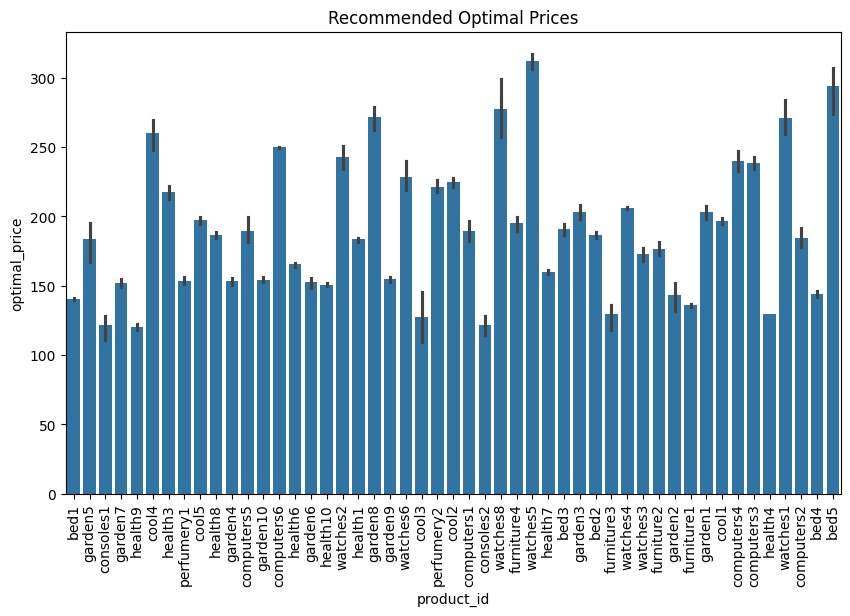

In [94]:
#Result
# Plotting the optimal price
plt.figure(figsize=(10, 6))
sns.barplot(x='product_id', y='optimal_price', data=optimal_prices)
plt.title('Recommended Optimal Prices')
plt.xticks(rotation=90)
plt.show()


## Descriptive Statistics & Visualizations

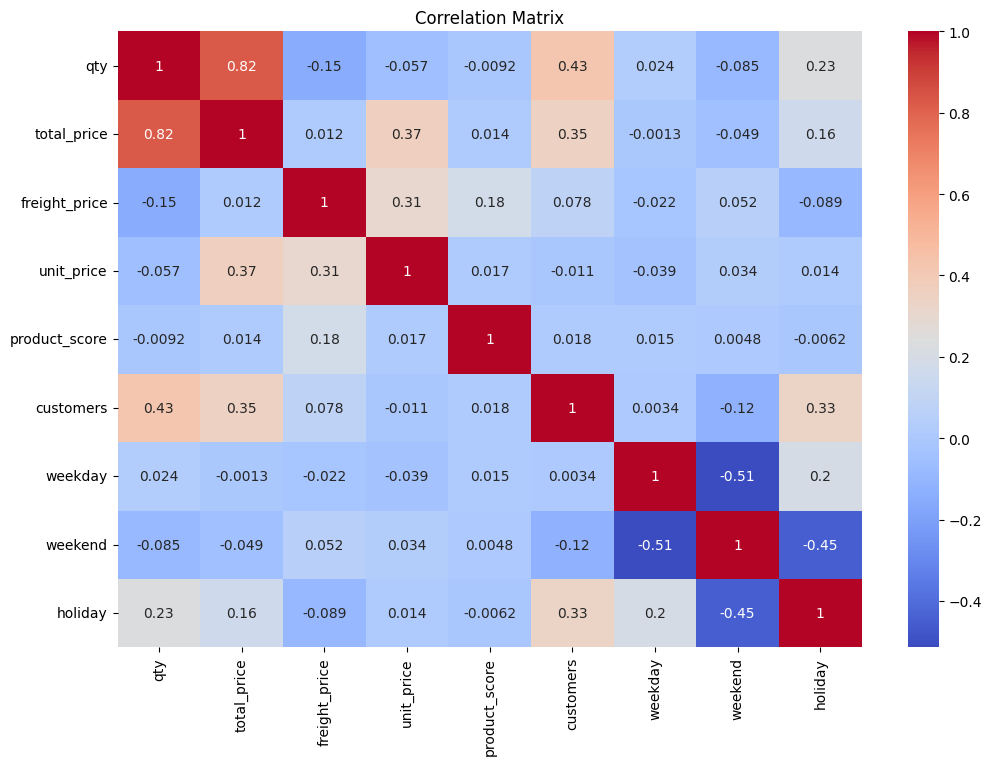

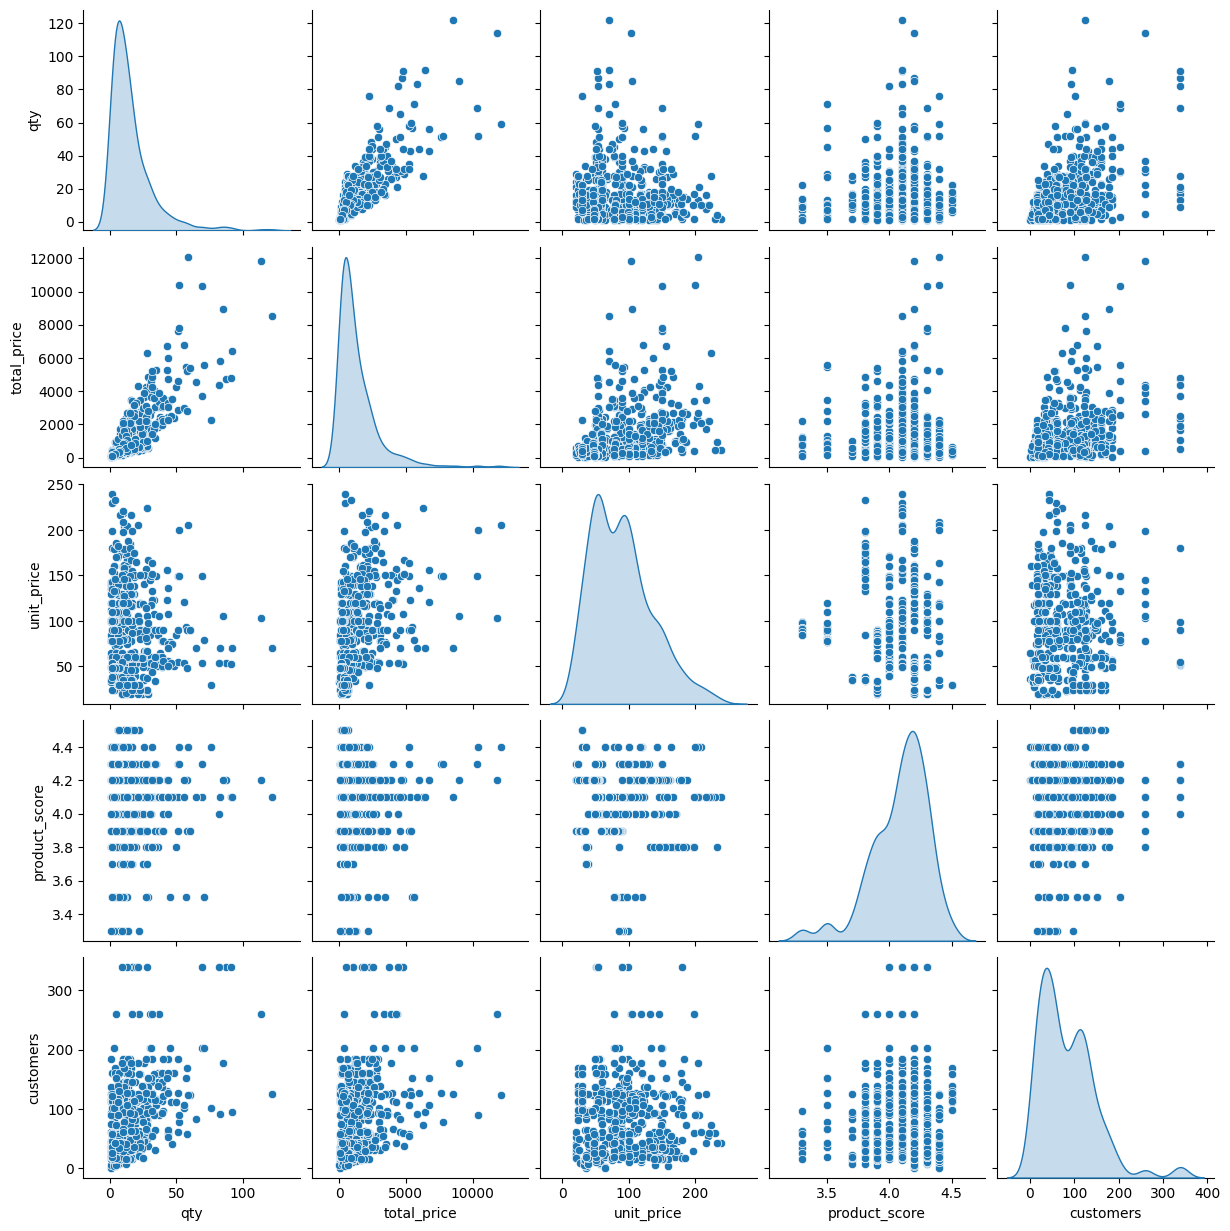

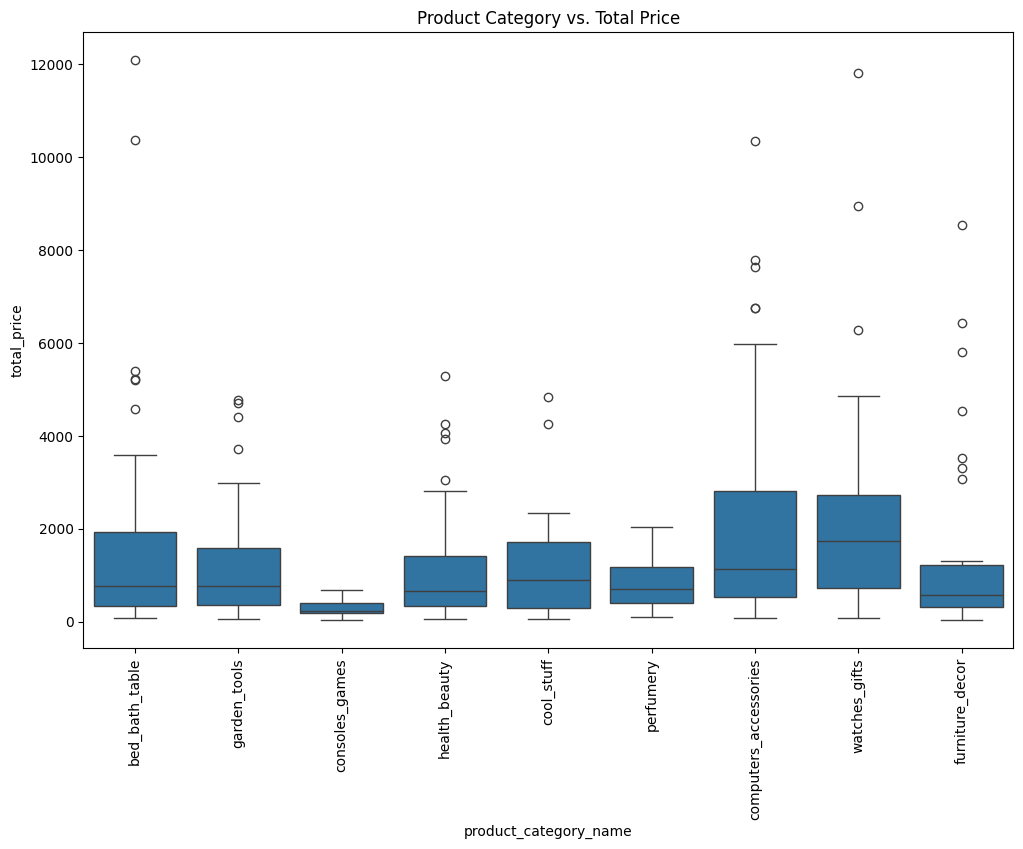

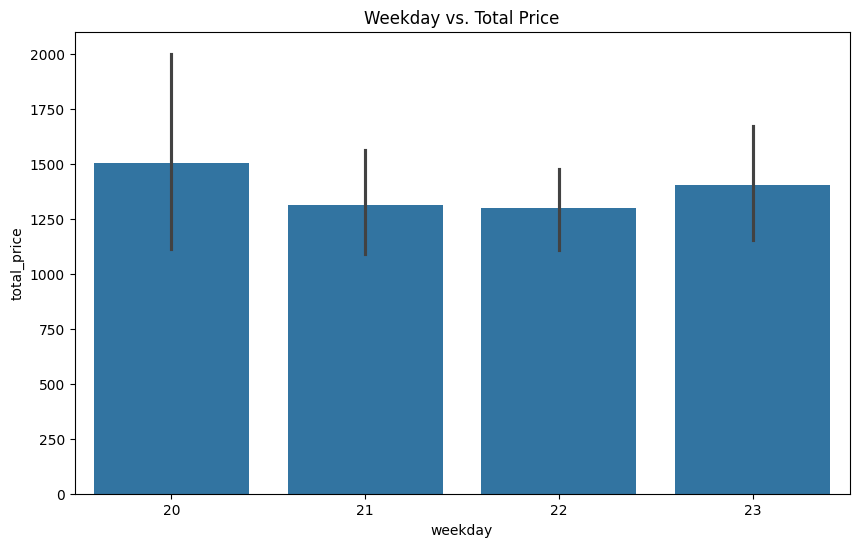

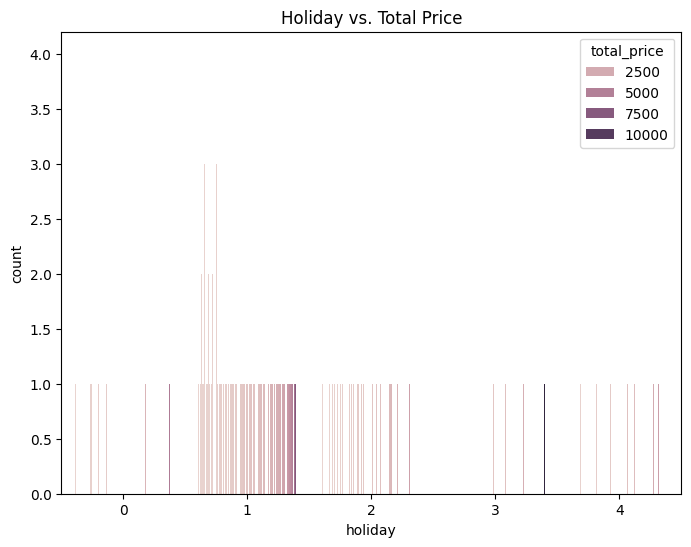

In [95]:
# Subset the dataset with relevant columns
subset_cols = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_score', 'customers', 'weekday', 'weekend', 'holiday']
subset_df = df[subset_cols]

# Compute correlation matrix
corr_matrix = subset_df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Pairwise scatter plot
sns.pairplot(subset_df, vars=['qty', 'total_price', 'unit_price', 'product_score', 'customers'], diag_kind='kde')
plt.show()

# Boxplot of product_category_name vs. total_price
plt.figure(figsize=(12, 8))
sns.boxplot(x='product_category_name', y='total_price', data=df)
plt.title('Product Category vs. Total Price')
plt.xticks(rotation=90)
plt.show()

# Bar plot of weekday vs. total_price
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='total_price', data=df)
plt.title('Weekday vs. Total Price')
plt.show()

# Count plot of holiday vs. total_price
plt.figure(figsize=(8, 6))
sns.countplot(x='holiday', data=df, hue='total_price')
plt.title('Holiday vs. Total Price')
plt.show()


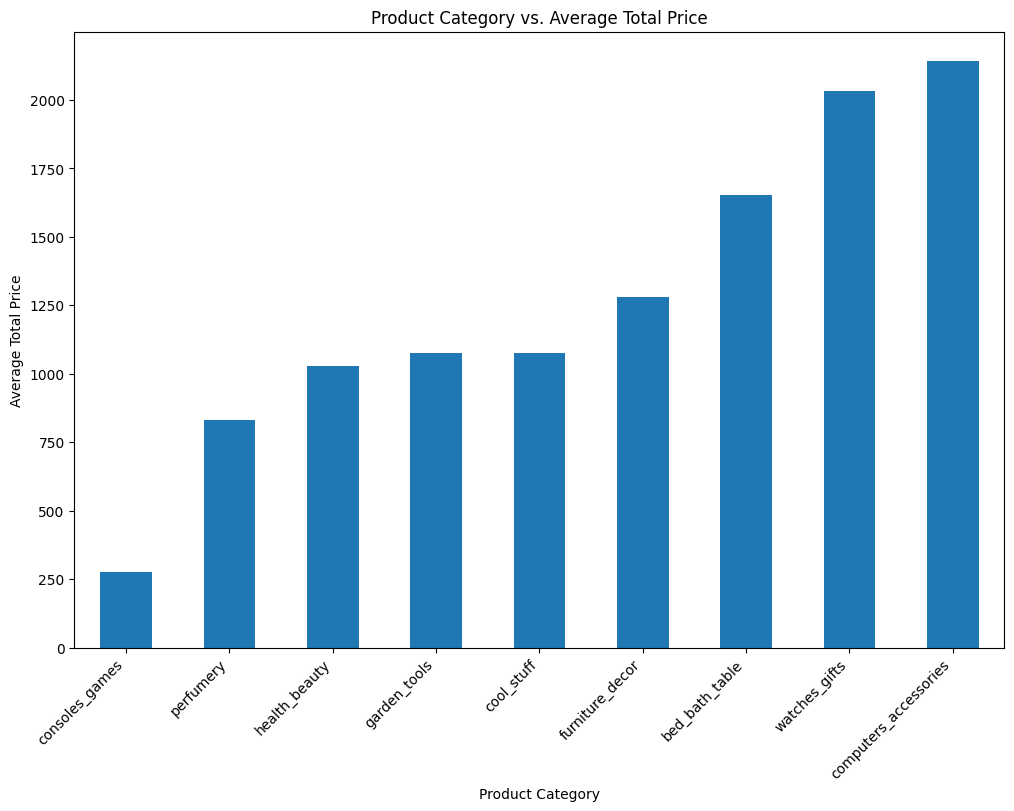

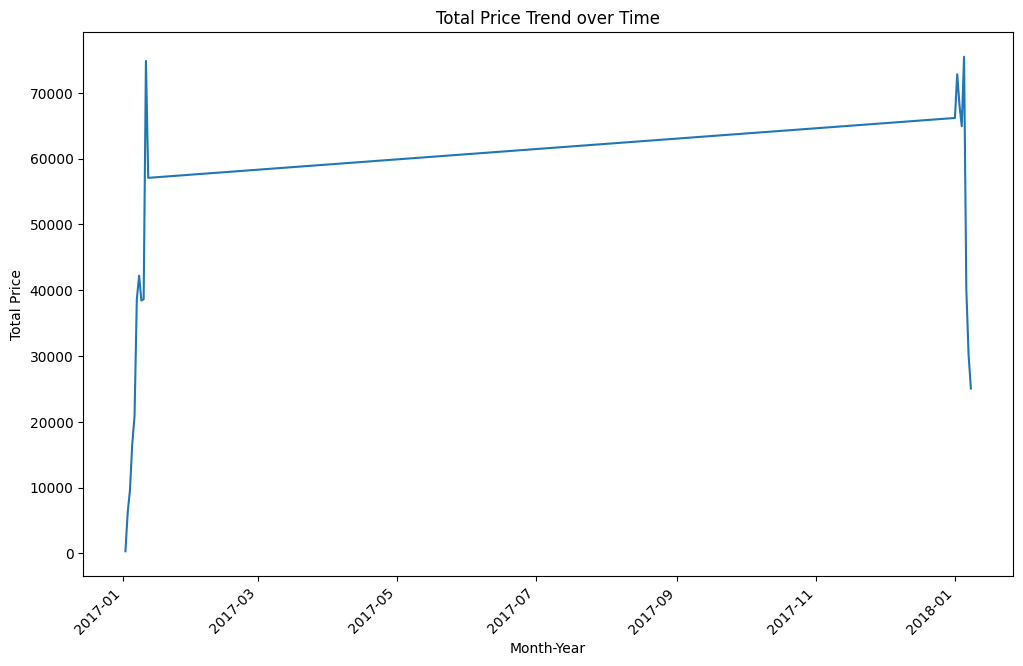

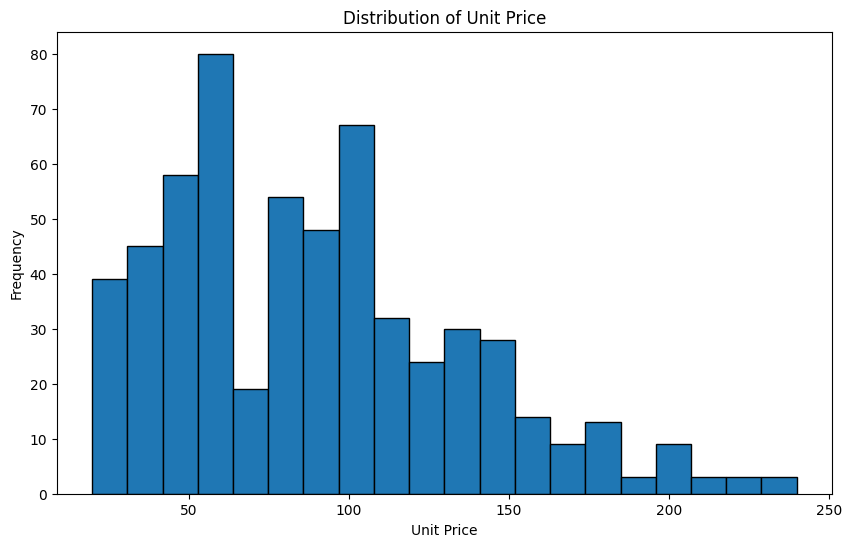

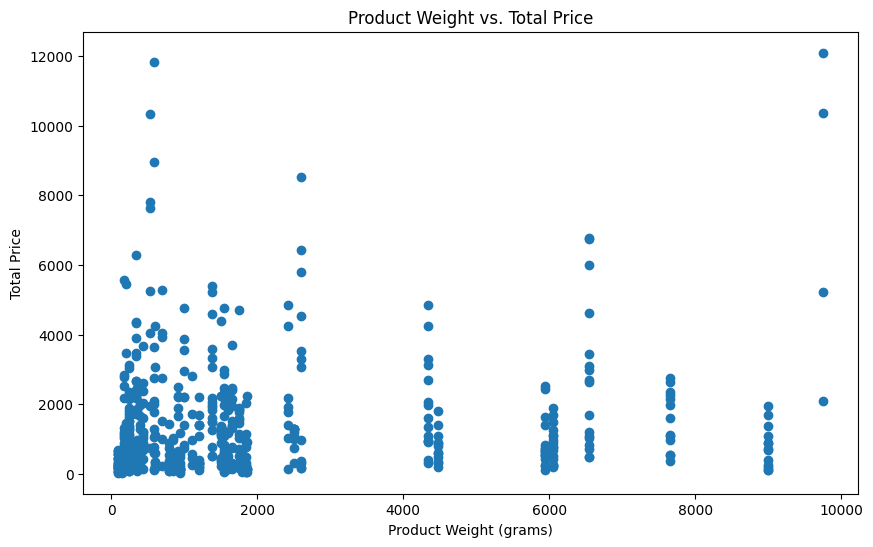

In [96]:
# Bar plot of product_category_name vs. total_price
plt.figure(figsize=(12, 8))
df.groupby('product_category_name')['total_price'].mean().sort_values().plot(kind='bar')
plt.title('Product Category vs. Average Total Price')
plt.xlabel('Product Category')
plt.ylabel('Average Total Price')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

# Line plot of month_year vs. total_price
plt.figure(figsize=(12, 8))
df.groupby('month_year')['total_price'].sum().plot(kind='line')
plt.title('Total Price Trend over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Price')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

# Histogram of unit_price
plt.figure(figsize=(10, 6))
plt.hist(df['unit_price'], bins=20, edgecolor='k')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of product_weight_g vs. total_price
plt.figure(figsize=(10, 6))
plt.scatter(df['product_weight_g'], df['total_price'])
plt.title('Product Weight vs. Total Price')
plt.xlabel('Product Weight (grams)')
plt.ylabel('Total Price')
plt.show()

## Insights and Recommendations for the Price Optimization Use Case
1. Key Variables Influencing Price Optimization:

  *  Quantity (qty): Higher quantities might indicate better demand or bulk purchasing. Consider using quantity as an indicator of customer behavior. Products with higher quantities sold might allow for more competitive pricing due to economies of scale.

  * Freight Price (freight_price): Shipping costs can directly impact profitability. Freight price should be factored into the final price to ensure the overall profitability of each product.

  * Product Weight (product_weight_g): Heavier products typically incur higher shipping costs, which should be factored into the pricing strategy. You might want to apply a weight-based surcharge.

  * Customer Counts (customers): The number of customers who purchase a product might reflect its popularity. This can be a strong indicator for dynamic pricing, where products with high customer interest might justify premium pricing or discounts based on competition.

  * Day of the Week (weekday): Pricing strategies can be adjusted based on demand trends. For example, weekends might see a surge in purchases for certain categories (e.g., leisure products), allowing for adjusted prices.

  * Seasonality (month, year): Products might have different demand levels based on the month or season (e.g., holiday products). Implementing dynamic pricing based on time periods can optimize sales.

  * Lagged Price (lag_price): The previous price of a product can affect demand. If the previous price was lower and the price is increased, it might negatively impact sales, especially if the price increase is not justified by value.

2. Descriptive Statistics and Visualizations Insights:

  * Price Distribution: Understanding the price distribution of different products can help identify potential pricing gaps or opportunities. A skewed distribution in product prices could indicate underpricing or overpricing in certain categories.

  * Customer Behavior Trends: Visualization of customers vs unit_price might show that higher prices are correlated with fewer customers. This is typical of luxury or niche products. Conversely, lower prices might attract more customers but could hurt margins.

  * Sales Trends Over Time: Visualizing sales volume (qty) vs month can reveal seasonality patterns. This helps in predicting high and low-demand periods and setting prices accordingly (e.g., higher prices during peak seasons and promotional discounts during off-peak periods).

  * Competitor Pricing: Compare product prices (comp_1, comp_2, comp_3) against your own prices to identify pricing discrepancies. Competitive pricing analysis can help you stay aligned with the market and avoid losing customers to competitors offering lower prices for similar products.

3. Feature Engineering and Price Prediction Model:

  * Revenue and Profit Features: Creating features such as revenue = qty * unit_price and profit = revenue - freight_price - production_cost would provide better insight into a product’s profitability. Profit margin can be calculated to assess pricing efficiency (profit_margin = profit / revenue).

  * Dynamic Pricing Models: Price prediction can be enhanced by incorporating demand elasticity, i.e., how sensitive the quantity sold is to price changes. Products with higher demand elasticity might benefit from lower prices to increase sales volume, while inelastic products could sustain higher prices.

  * Competitor and Market Factors: Use competitor pricing as a feature (comp_1, comp_2, comp_3). If your price is significantly higher than competitors, the model might suggest lowering prices, especially if demand is price-sensitive.

  * Time-Related Features: is_weekend and is_holiday can capture demand surges on weekends and holidays. Certain products might benefit from a price increase during these periods due to higher demand.

4. Pricing Strategy Recommendations:

  * Competitive Pricing: Your pricing model should consider competitor prices (comp_1, comp_2, comp_3). If competitors have significantly lower prices, it may be necessary to lower your prices or justify the price difference with higher perceived value or product features.

  * Price Elasticity Analysis: Identify products that are highly elastic (sensitive to price changes) and consider setting a lower price to boost volume. For inelastic products (e.g., essentials or luxury items), maintain higher prices to maximize profits.

  * Seasonal Adjustments: Price products higher during peak demand months and lower during off-peak periods. For example, if products are in demand during the winter season, increase the price slightly during those months.

  * Promotions and Discounts: Offer promotions or discounts based on customer segmentation. If the model identifies customers who are more price-sensitive, offer them targeted discounts to increase their purchasing frequency.

  * Bundle Pricing: Consider bundling products together at a discount. If certain products are commonly bought together (as indicated by qty and customers), offer bundle discounts to increase sales.

  * Freight Price Optimization: Factor in freight price more effectively. For high-weight products, you could charge customers a higher freight price or adjust the product’s price to offset the additional shipping cost.

5. Final Pricing Strategy & Implementation:

  * Price Segmentation: Segment the products into categories based on demand, elasticity, and cost. Each category could have its own pricing strategy (e.g., discounting for high-demand but low-margin products, premium pricing for low-demand but high-margin products).

  * Optimization Model: Use machine learning models (e.g., Linear Regression, Random Forest, or Gradient Boosting) to predict the optimal price for each product by incorporating features like demand, competition, and seasonality.

  * Real-Time Dynamic Pricing: Implement real-time dynamic pricing based on changing demand and competitor prices. By leveraging historical data, the model can adapt to pricing changes and fluctuations in customer behavior.

  * Visualization for Stakeholders: Create dashboards using tools like Tableau or Power BI to visualize pricing strategies and their impact on sales and revenue. This will allow business stakeholders to make informed decisions on pricing adjustments.